# Make plots from Latinos postprocessing

**Warning**: root_numpy is not installed by default in new CMSSW framework. You can download it from git and install locally to be able to use this notebook.

In [1]:
import ROOT
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import awkward as ak
import os
import sys
import subprocess
import root_numpy as rnp
from array import array
import time

Welcome to JupyROOT 6.26/04


In [2]:
sc

<SparkContext master=yarn appName=pyspark_shell_swan>

In [3]:
spark

## Lets introduce the samples and general paths as in Latinos framework

In [4]:
mcProduction = 'Winter22_122X_nAODv9_Full2022v9'
mcSteps = 'MCl1loose2022v9__l2tightOR2022v9'


SITE='cern'
if  'cern' in SITE:
    xrootdPath  = 'root://eoscms.cern.ch/'
    treeBaseDir = '/eos/cms/store/group/phys_higgs/cmshww/calderon/HToWXWX-2022'

def makeMCDirectory(var=''):
    if var:
        return os.path.join(treeBaseDir, mcProduction, mcSteps.format(var='__' + var))
        #return '/afs/cern.ch/user/y/yiiyama/public/hwwvirtual/Summer16/l2tightOR__{var}'.format(var=var)                                                                                                                                     
    else:
        return os.path.join(treeBaseDir, mcProduction, mcSteps.format(var=''))
        #return '/afs/cern.ch/user/y/yiiyama/public/hwwvirtual/Summer16/l2tightOR'   
        
        
mcDirectory = makeMCDirectory()

def nanoGetSampleFiles(inputDir, sample):
    try:
        if _samples_noload:
            return []
    except NameError:
        pass

    return getSampleFiles(inputDir, sample, True, 'nanoLatino_')

In [5]:
DataSets = ['MuonEG','DoubleMuon','SingleMuon','EGamma']

DataTrig = {
            'MuonEG'         : 'Trigger_ElMu' ,
            'DoubleMuon'     : '!Trigger_ElMu && Trigger_dblMu' ,
            'SingleMuon'     : '!Trigger_ElMu && !Trigger_dblMu && Trigger_sngMu' ,
            'EGamma'         : '!Trigger_ElMu && !Trigger_dblMu && !Trigger_sngMu && (Trigger_sngEl || Trigger_dblEl)' ,
           }

mcCommonWeightNoMatch = ''
mcCommonWeight = ''

In [6]:
def nanoGetSampleFiles(path, sample):
    
    cmd = "find {} -name '*.root'".format(path)
    fnames = subprocess.check_output(cmd, shell=True).strip().split(b'\n')
    fnames = [fname.decode('ascii') for fname in fnames]
    fnames = [fname for fname in fnames if sample in fname]
    
    return fnames
    

In [7]:
samples = {}
###########################################                                                                                                                                                                                                   
#############  BACKGROUNDS  ###############                                                                                                                                                                                                   
###########################################                                                                                                                                                                                                   


###### WW ########                                                                                                                                                                                                                            

samples['WW'] = {
    'name': nanoGetSampleFiles(mcDirectory, 'WW_TuneCP5_13p6TeV-pythia8'),
    'weight': mcCommonWeight,
    'FilesPerJob': 1,
    'xsec': 80.42,
    'kfact': 1.0
}

samples['top'] = {
    'name': nanoGetSampleFiles(mcDirectory, 'TTTo2L2Nu'),
    'weight': mcCommonWeight,
    'FilesPerJob': 1,
    'xsec': 96.9,
    'kfact': 1.0
}

samples['DYJetsToLL_M-10to50'] = {
    'name': nanoGetSampleFiles(mcDirectory, 'DYJetsToLL_M-10to50'),
    'weight': mcCommonWeight,
    'FilesPerJob': 1,
    'xsec': 19317.5,
    'kfact': 1.0
}

samples['DYJetsToLL_M-50'] = {
    'name': nanoGetSampleFiles(mcDirectory, 'DYJetsToLL_M-50'),
    'weight': mcCommonWeight,
    'FilesPerJob': 1,
    'xsec': 6221.3,
    'kfact': 1.0
}

In [8]:
samples['WW']['name']

['/eos/cms/store/group/phys_higgs/cmshww/calderon/HToWXWX-2022/Winter22_122X_nAODv9_Full2022v9/MCl1loose2022v9__l2tightOR2022v9/nanoLatino_WW_TuneCP5_13p6TeV-pythia8__part0.root',
 '/eos/cms/store/group/phys_higgs/cmshww/calderon/HToWXWX-2022/Winter22_122X_nAODv9_Full2022v9/MCl1loose2022v9__l2tightOR2022v9/nanoLatino_WW_TuneCP5_13p6TeV-pythia8__part1.root',
 '/eos/cms/store/group/phys_higgs/cmshww/calderon/HToWXWX-2022/Winter22_122X_nAODv9_Full2022v9/MCl1loose2022v9__l2tightOR2022v9/nanoLatino_WW_TuneCP5_13p6TeV-pythia8__part10.root',
 '/eos/cms/store/group/phys_higgs/cmshww/calderon/HToWXWX-2022/Winter22_122X_nAODv9_Full2022v9/MCl1loose2022v9__l2tightOR2022v9/nanoLatino_WW_TuneCP5_13p6TeV-pythia8__part11.root',
 '/eos/cms/store/group/phys_higgs/cmshww/calderon/HToWXWX-2022/Winter22_122X_nAODv9_Full2022v9/MCl1loose2022v9__l2tightOR2022v9/nanoLatino_WW_TuneCP5_13p6TeV-pythia8__part12.root',
 '/eos/cms/store/group/phys_higgs/cmshww/calderon/HToWXWX-2022/Winter22_122X_nAODv9_Full2022v9/MC

# Variables

In [9]:
variables = {}

variables['leppt1'] = {   'name'  : 'Lepton_pt[0]',
                          'range' : (20, 0.0, 200.0),                                                                                                                                                                                        
                          'xaxis' : 'p_{T}^{l1}',
                          'fold'  : 3}

variables['PuppiMET_pt'] = {   'name'  : 'PuppiMET_pt',
                               'range' : (20, 0.0, 150.0),                                                                                                                                                                                        
                               'xaxis' : 'Puppi p_{T}^{miss}',
                               'fold'  : 3}

variables['mll'] = {      'name'  : 'mll',
                          'load' : "mll.C+g",
                          'command': "mll(Lepton_pt[0], Lepton_phi[0], Lepton_eta[0], Lepton_pt[1], Lepton_phi[1], Lepton_eta[1])",
                          'range' : (20, 0.0, 200.0),                                                                                                                                                                                        
                          'xaxis' : 'm_{ll}',
                          'fold'  : 3}


variables['njets'] = {   'name'  : 'ROOT::VecOps::Sum(CleanJet_pt > 30.)',
                               'range' : (5, 0, 5),                                                                                                                                                                                        
                               'xaxis' : 'Number of jets',
                               'fold'  : 3}

# Initialization

Start spark session and connect it to RDF

In [10]:
import pyspark

ROOT.EnableImplicitMT(4)
RDataFrame = ROOT.RDF.Experimental.Distributed.Spark.RDataFrame

In [11]:
start_time = time.time()

dfs = {}

for sample in samples:
    
    dfs[sample] = ROOT.RDataFrame('Events', samples[sample]['name']) 


print("--- %s seconds ---" % (time.time() - start_time))

--- 0.8508627414703369 seconds ---


In [12]:
dfs['WW'].Describe()

Dataframe from TChain Events in files
  /eos/cms/store/group/phys_higgs/cmshww/calderon/HToWXWX-2022/Winter22_122X_nAODv9_Full2022v9/MCl1loose2022v9__l2tightOR2022v9/nanoLatino_WW_TuneCP5_13p6TeV-pythia8__part0.root
  /eos/cms/store/group/phys_higgs/cmshww/calderon/HToWXWX-2022/Winter22_122X_nAODv9_Full2022v9/MCl1loose2022v9__l2tightOR2022v9/nanoLatino_WW_TuneCP5_13p6TeV-pythia8__part1.root
  /eos/cms/store/group/phys_higgs/cmshww/calderon/HToWXWX-2022/Winter22_122X_nAODv9_Full2022v9/MCl1loose2022v9__l2tightOR2022v9/nanoLatino_WW_TuneCP5_13p6TeV-pythia8__part10.root
  /eos/cms/store/group/phys_higgs/cmshww/calderon/HToWXWX-2022/Winter22_122X_nAODv9_Full2022v9/MCl1loose2022v9__l2tightOR2022v9/nanoLatino_WW_TuneCP5_13p6TeV-pythia8__part11.root
  /eos/cms/store/group/phys_higgs/cmshww/calderon/HToWXWX-2022/Winter22_122X_nAODv9_Full2022v9/MCl1loose2022v9__l2tightOR2022v9/nanoLatino_WW_TuneCP5_13p6TeV-pythia8__part12.root
  /eos/cms/store/group/phys_higgs/cmshww/calderon/HToWXWX-2022/Winter

Warning in <TClass::Init>: no dictionary for class edm::Hash<1> is available
Warning in <TClass::Init>: no dictionary for class edm::ProcessHistory is available
Warning in <TClass::Init>: no dictionary for class edm::ProcessConfiguration is available
Warning in <TClass::Init>: no dictionary for class edm::ParameterSetBlob is available
Warning in <TClass::Init>: no dictionary for class pair<edm::Hash<1>,edm::ParameterSetBlob> is available


# Compute XS weights

In [13]:
### Compute weights

start_time = time.time()

baseW = {}

for sample in samples:
    genEventSumw = 0
    for iFile in samples[sample]['name']:
        f = uproot.open(iFile)
        genEventSumw += f['Runs']['genEventSumw'].array()[0]
    nEvt = genEventSumw

    baseW[sample] = float(samples[sample]['xsec'])*1000./nEvt


for sample in samples:
    dfs[sample] = dfs[sample].Define("baseW", str(baseW[sample]))
    dfs[sample] = dfs[sample].Define('XSWeight', "genWeight*baseW")
    
print("--- %s seconds ---" % (time.time() - start_time))

--- 1.6855530738830566 seconds ---


# Selection

In [14]:
###
### WW SR 
###

_tmp = [
     'Lepton_pdgId[0]*Lepton_pdgId[1] == -11*13',
     'Lepton_pt[0] > 20.',
     'Lepton_pt[1] > 15.',
     'ROOT::VecOps::Sum(Lepton_pt > 10)<=2',
     '(abs(Lepton_pdgId[1]) == 13 || Lepton_pt[1] > 13.)',
     'PuppiMET_pt > 20',
     'ROOT::VecOps::Sum(CleanJet_pt > 20. && abs(CleanJet_eta) < 2.5 && ROOT::VecOps::Take(Jet_btagDeepB, CleanJet_jetIdx)>0.1)==0',
     #'ROOT::VecOps::Sum(CleanJet_pt > 30.)==0',
     ]
supercut = ' && '.join(_tmp)

In [177]:
###
### DY control region
###

_tmp = [
     'Lepton_pdgId[0]*Lepton_pdgId[1] == -13*13',
     'Lepton_pt[0] > 20.',
     'Lepton_pt[1] > 15.',
     'ROOT::VecOps::Sum(Lepton_pt > 10)<=2',
     '(abs(Lepton_pdgId[1]) == 13 || Lepton_pt[1] > 13.)',
     'ROOT::VecOps::Sum(CleanJet_pt > 20. && abs(CleanJet_eta) < 2.5 && ROOT::VecOps::Take(Jet_btagDeepB, CleanJet_jetIdx)>0.1)==0',
     #'ROOT::VecOps::Sum(CleanJet_pt > 30.)==0',
     ]
supercut = ' && '.join(_tmp)

## Apply cuts

In [15]:
print("Events in WW dataset before cuts: " + str(dfs['WW'].Count().GetValue()))
print("Events in top dataset before cuts: " + str(dfs['top'].Count().GetValue()))

Events in WW dataset before cuts: 381754
Events in top dataset before cuts: 4910653


In [16]:
start_time = time.time()

for sample in samples:
    dfs[sample] = dfs[sample].Filter(supercut)

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.2456352710723877 seconds ---


In [17]:
print("Events in WW dataset after cuts: " + str(dfs['WW'].Count().GetValue()))
print("Events in top dataset after cuts: " + str(dfs['top'].Count().GetValue()))

Events in WW dataset after cuts: 124764
Events in top dataset after cuts: 95961


# Make historgrams

Lets run a loop over all the variables and samples defined above to make the precise histograms. They are going to be saved in a dictionary called histos, that contains a TH1D for each sample and variable.

In [18]:
start_time = time.time()


histos = {}

columns = dfs['WW'].GetColumnNames()

not_in_column = {}


for sample in samples:
    
    for v in variables:
        
        if variables[v]['name'] in dfs[sample].GetColumnNames():
            continue
        
        if 'load' in variables[v]:
            ROOT.gROOT.LoadMacro(variables[v]['load'])
            dfs[sample] = dfs[sample].Define(v, variables[v]['command'])            
            
        elif variables[v]['name'] not in columns:
            dfs[sample] = dfs[sample].Define(v, variables[v]['name'])
          

for sample in samples:
    
    histos[sample] = {}
    
    for v in variables:
        dummy = ROOT.RDF.TH1DModel(v, v, variables[v]['range'][0], variables[v]['range'][1], variables[v]['range'][2])
        
        if variables[v]['name'] in dfs[sample].GetColumnNames():
            histos[sample][v] = dfs[sample].Histo1D(dummy, variables[v]['name'], "XSWeight")
        else:
            histos[sample][v] = dfs[sample].Histo1D(dummy, v, "XSWeight")
        
        
print("--- %s seconds ---" % (time.time() - start_time))

--- 10.86222219467163 seconds ---


Info in <ACLiC>: unmodified script has already been compiled and loaded
Info in <ACLiC>: unmodified script has already been compiled and loaded


In [19]:
histos

{'WW': {'leppt1': <cppyy.gbl.ROOT.RDF.RResultPtr<TH1D> object at 0xf6e6400>,
  'PuppiMET_pt': <cppyy.gbl.ROOT.RDF.RResultPtr<TH1D> object at 0x1cf46c70>,
  'mll': <cppyy.gbl.ROOT.RDF.RResultPtr<TH1D> object at 0x1cf5f5f0>,
  'njets': <cppyy.gbl.ROOT.RDF.RResultPtr<TH1D> object at 0x1c7e9800>},
 'top': {'leppt1': <cppyy.gbl.ROOT.RDF.RResultPtr<TH1D> object at 0x1cfd1e20>,
  'PuppiMET_pt': <cppyy.gbl.ROOT.RDF.RResultPtr<TH1D> object at 0x1cf82040>,
  'mll': <cppyy.gbl.ROOT.RDF.RResultPtr<TH1D> object at 0xbc10700>,
  'njets': <cppyy.gbl.ROOT.RDF.RResultPtr<TH1D> object at 0x1cf64970>},
 'DYJetsToLL_M-10to50': {'leppt1': <cppyy.gbl.ROOT.RDF.RResultPtr<TH1D> object at 0x1cf65490>,
  'PuppiMET_pt': <cppyy.gbl.ROOT.RDF.RResultPtr<TH1D> object at 0x1cf37060>,
  'mll': <cppyy.gbl.ROOT.RDF.RResultPtr<TH1D> object at 0xbc0bd50>,
  'njets': <cppyy.gbl.ROOT.RDF.RResultPtr<TH1D> object at 0x1d0063f0>},
 'DYJetsToLL_M-50': {'leppt1': <cppyy.gbl.ROOT.RDF.RResultPtr<TH1D> object at 0x1cfeace0>,
  'Pup

# Plot configuration

In [20]:
plot_cfg = {
    
    'top': {
        
        'isSignal' : 0,
        'color' : 400,
        'nameHR': 'tw and ttbar',
        'samples': ['top']
        
    },
    
    'WW': {
        
        'isSignal' : 0,
        'color' : 851,
        'nameHR': 'WW',
        'samples': ['WW']
        
    },
    
    'DY': {  
        'nameHR' : "DY",
        'isSignal' : 0,
        'color': 418,    # kGreen+2                                                                                                                                                                                                 
        'samples'  : ['DYJetsToLL_M-10to50','DYJetsToLL_M-50']
    },
    
}

# Plots

Run over TH1 histos created before and construct a THStack for each variable to make the plots.

In [21]:
start_time = time.time()

plot = {}

legend = {}

frame = {}

tgrMC_vx = {}
tgrMC_vy = {}
tgrMC_evx = {}
tgrMC = {}

#lumi = 40
lumi = 2.735112651 # Only Run2022D

for v in variables:
    
    plot[v] = ROOT.THStack(v, "")
    
    first = True
    
    legend[v] = ROOT.TLegend(0.20, 0.65, 0.80, 0.88)
    legend[v].SetFillColor(0)
    legend[v].SetTextFont(42)
    legend[v].SetTextSize(0.02)
    legend[v].SetLineColor(0)
    legend[v].SetShadowColor(0)
    legend[v].SetNColumns(2)
    
    for sample in plot_cfg:
        
        subfirst = True
        for subsample in plot_cfg[sample]['samples']:
            if subfirst:
                histograms = histos[subsample][v].Clone()
                subfirst = False
            else:
                histograms.Add(histos[subsample][v].Clone())
        
        histograms.SetFillColor(plot_cfg[sample]['color'])
        histograms.SetMarkerColor(plot_cfg[sample]['color'])
    
        histograms.SetMarkerSize(1)
        histograms.SetMarkerStyle(20)
        histograms.SetLineColor(plot_cfg[sample]['color'])
        
        histograms.GetYaxis().SetTitle("Events / 0.1 units")
        histograms.SetTitle("")
        histograms.GetYaxis().SetTitleOffset(1.4) 
        histograms.GetXaxis().SetLabelSize(0.)
        histograms.GetXaxis().SetTitleSize(0.)
        
        lumi_scale = lumi
        #lumi_scale = histograms.Integral() / histograms.GetEntries() / lumi # Without baseW
        histograms.Scale(lumi_scale)
    
        plot[v].Add(histograms)

        legend[v].AddEntry(histograms, plot_cfg[sample]['nameHR'] + " [" +  str(round(histograms.Integral(),1)) + "]", "F")       
        
        if first:
            hist_total = histograms.Clone()
            first = False
        else:
            hist_total.Add(hist_total, histograms)
    
    
    ## Compute uncertainties
    tgrMC_vx[v] = array('f')
    tgrMC_vy[v] = array('f')
    tgrMC_evx[v] = array('f')
    tgrMC[v] = ROOT.TGraphAsymmErrors() 
    
    for iBin in range(1, plot[v].GetStack().Last().GetNbinsX()+1):
        tgrMC_vx[v] .append(plot[v].GetStack().Last().GetBinCenter(iBin))
        tgrMC_evx[v].append(plot[v].GetStack().Last().GetBinWidth(iBin) / 2.)
        
    last = plot[v].GetStack().Last()
    
    for iBin in range(0, len(tgrMC_vx[v])):
        tgrMC_vy[v].append(plot[v].GetStack().Last().GetBinContent(iBin+1))
    
    for iBin in range(0, len(tgrMC_vx[v])):
        tgrMC[v].SetPoint     (iBin, tgrMC_vx[v][iBin], hist_total.GetBinContent(iBin+1))                   
        tgrMC[v].SetPointError(iBin, tgrMC_evx[v][iBin], tgrMC_evx[v][iBin], hist_total.GetBinError(iBin+1), hist_total.GetBinError(iBin+1))
        
print("--- %s seconds ---" % (time.time() - start_time))

--- 22.789466619491577 seconds ---


# Draw histograms

Warning in <TCanvas::Constructor>: Deleting canvas with same name: histogram_njets


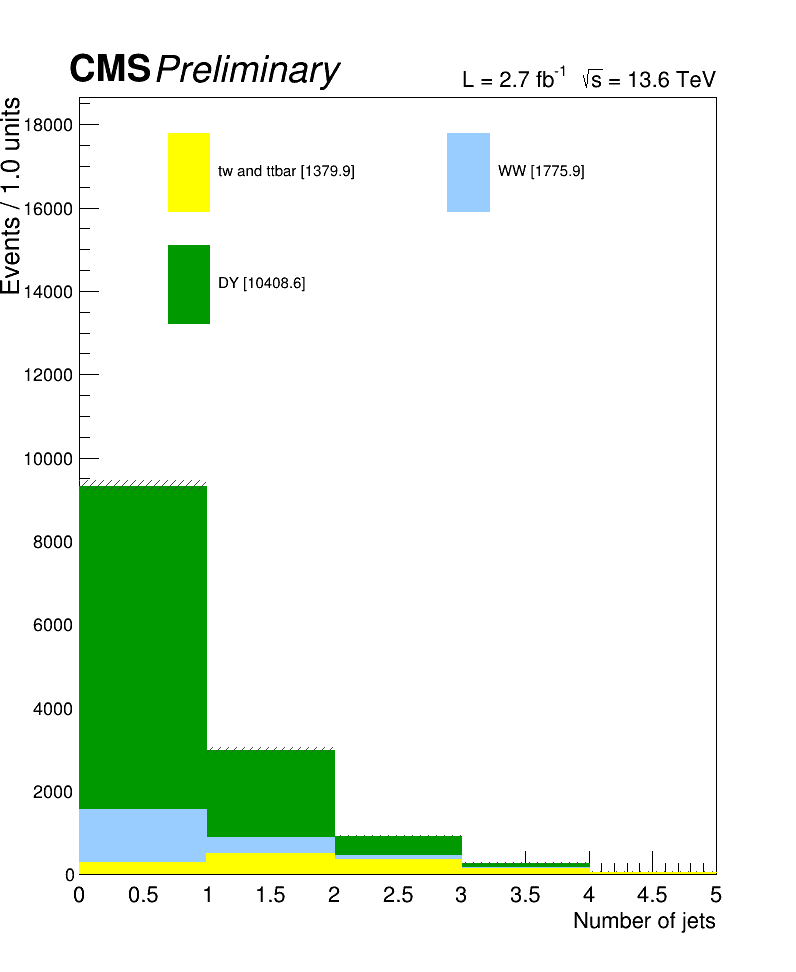

In [24]:
import CMS_lumi as CMS_lumi

tcanvas = ROOT.TCanvas("histogram_njets", "histogram_njets", 800, 1000)

minXused = variables['njets']['range'][1]
maxXused = variables['njets']['range'][2]
  
%jsroot off
    
frame = ROOT.TH1F
frame = tcanvas.DrawFrame(minXused, 0.0, maxXused, 2.0*plot['njets'].GetMaximum())
frame.GetXaxis().SetTitle("")
nbins = variables['njets']['range'][0]
frame.GetYaxis().SetTitle("Events / " + str(round((maxXused-minXused)/nbins, 1)) + " units")
frame.GetYaxis().SetTitleOffset(1.55) 
frame.GetYaxis().SetLabelSize(0.025)

frame.GetXaxis().SetTitle(variables['njets']['xaxis'])
frame.GetXaxis().SetLabelSize(0.03)
frame.GetXaxis().SetTitleSize(0.03)
#frame.GetXaxis().SetTitleOffset(0.8)


    
frame.Draw()

plot['njets'].Draw("hist same")

tgrMC['njets'].SetLineColor(12)
tgrMC['njets'].SetFillColor(12)
tgrMC['njets'].SetLineWidth(2)
tgrMC['njets'].SetFillStyle(3004)
tgrMC['njets'].Draw("2")

legend['njets'].Draw("same")
    

cmsText     = "CMS";
cmsTextFont = 61  

writeExtraText = True
extraText      = "Preliminary"
extraTextFont  = 52 
lumi_13TeV = 'L = %.1f fb^{-1}  #sqrt{s} = 13.6 TeV' % lumi


latex = ROOT.TLatex()
latex.SetNDC()
latex.SetTextAngle(0)
latex.SetTextColor(ROOT.kBlack)    

extraTextSize = 0.5

latex.SetTextFont(42)
latex.SetTextAlign(31) 
#latex.SetTextSize(lumiTextSize*t) 
latex.SetTextSize(0.03) 

latex.DrawLatex(0.90,0.91,lumi_13TeV)


latex.SetTextFont(cmsTextFont)
latex.SetTextSize(0.05)
latex.SetTextAlign(32)
latex.DrawLatex(0.19, 0.93, cmsText)

latex.SetTextFont(extraTextFont)
latex.DrawLatex(0.43, 0.925, extraText)



tcanvas.Draw()

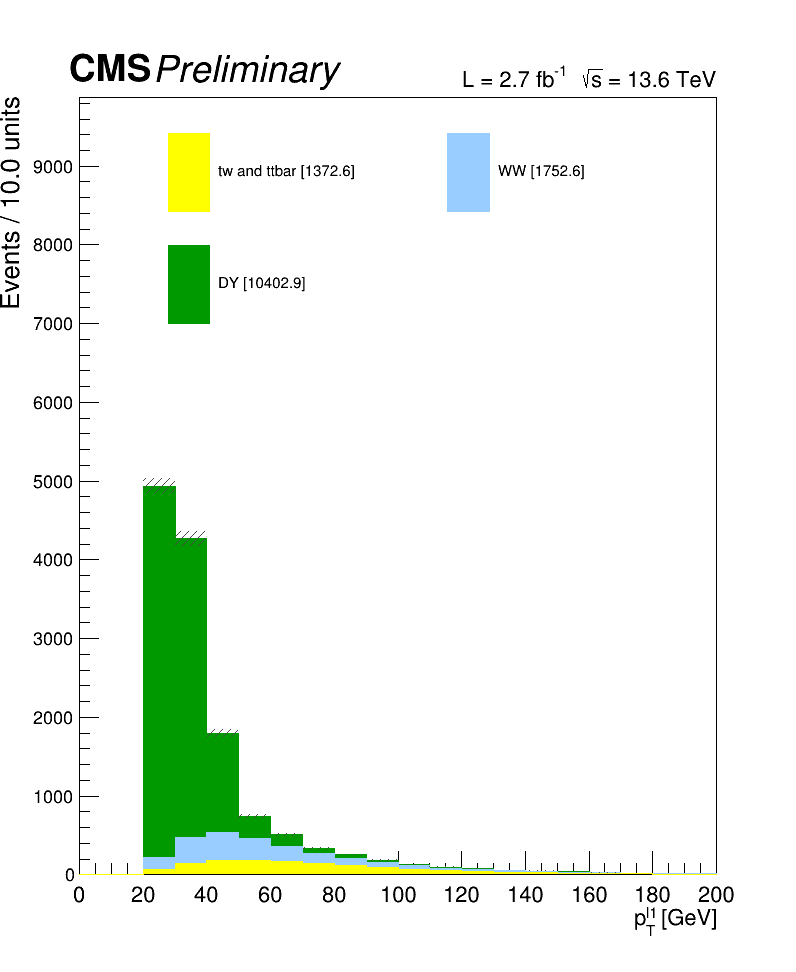

In [25]:
import CMS_lumi as CMS_lumi

tcanvas = ROOT.TCanvas("histogram", "histogram", 800, 1000)

minXused = variables['leppt1']['range'][1]
maxXused = variables['leppt1']['range'][2]
  
    
frame = ROOT.TH1F
frame = tcanvas.DrawFrame(minXused, 0.0, maxXused, 2.0*plot['leppt1'].GetMaximum())
frame.GetXaxis().SetTitle("")
nbins = variables['leppt1']['range'][0]
frame.GetYaxis().SetTitle("Events / " + str(round((maxXused-minXused)/nbins, 1)) + " units")
frame.GetYaxis().SetTitleOffset(1.55) 
frame.GetYaxis().SetLabelSize(0.025)

frame.GetXaxis().SetTitle(variables['leppt1']['xaxis'] + ' [GeV]')
frame.GetXaxis().SetLabelSize(0.03)
frame.GetXaxis().SetTitleSize(0.03)
#frame.GetXaxis().SetTitleOffset(0.8)

    
frame.Draw()

plot['leppt1'].Draw("hist same")

tgrMC['leppt1'].SetLineColor(12)
tgrMC['leppt1'].SetFillColor(12)
tgrMC['leppt1'].SetLineWidth(2)
tgrMC['leppt1'].SetFillStyle(3004)
tgrMC['leppt1'].Draw("2")

legend['leppt1'].Draw("same")
    

cmsText     = "CMS";
cmsTextFont = 61  

writeExtraText = True
extraText      = "Preliminary"
extraTextFont  = 52 
lumi_13TeV = 'L = %.1f fb^{-1}  #sqrt{s} = 13.6 TeV' % lumi


latex = ROOT.TLatex()
latex.SetNDC()
latex.SetTextAngle(0)
latex.SetTextColor(ROOT.kBlack)    

extraTextSize = 0.5

latex.SetTextFont(42)
latex.SetTextAlign(31) 
#latex.SetTextSize(lumiTextSize*t) 
latex.SetTextSize(0.03) 

latex.DrawLatex(0.90,0.91,lumi_13TeV)


latex.SetTextFont(cmsTextFont)
latex.SetTextSize(0.05)
latex.SetTextAlign(32)
latex.DrawLatex(0.19, 0.93, cmsText)

latex.SetTextFont(extraTextFont)
latex.DrawLatex(0.43, 0.925, extraText)



tcanvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: histogram


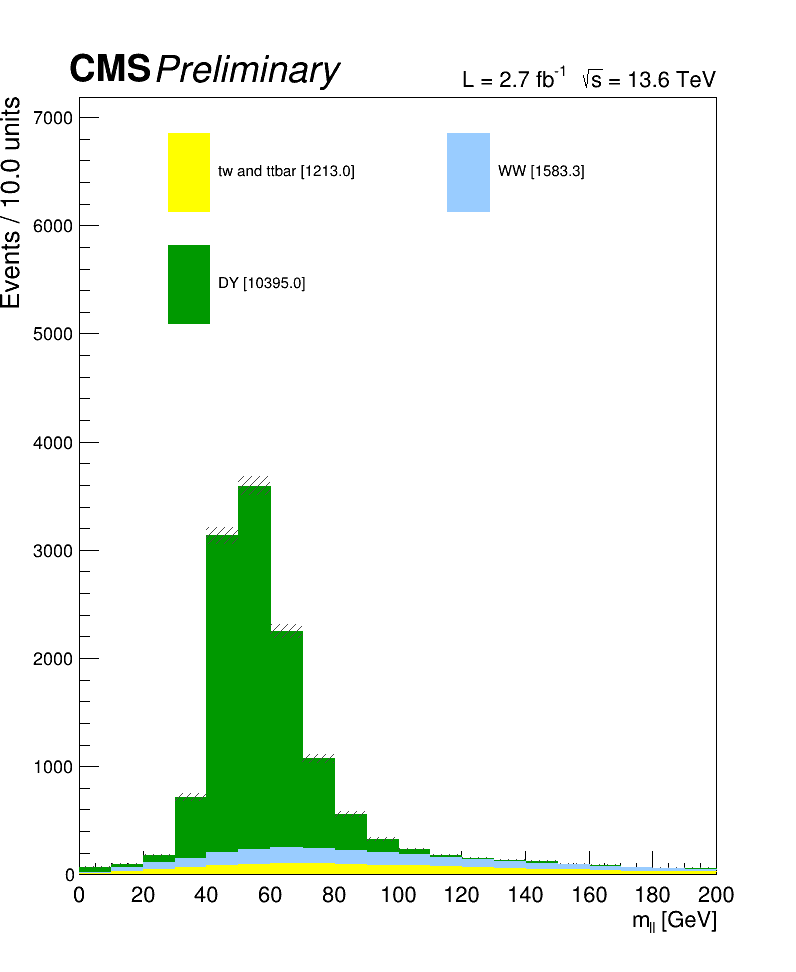

In [26]:
import CMS_lumi as CMS_lumi

tcanvas = ROOT.TCanvas("histogram", "histogram", 800, 1000)

minXused = variables['mll']['range'][1]
maxXused = variables['mll']['range'][2]
  
    
frame = ROOT.TH1F
frame = tcanvas.DrawFrame(minXused, 0.0, maxXused, 2.0*plot['mll'].GetMaximum())
frame.GetXaxis().SetTitle("")
nbins = variables['mll']['range'][0]
frame.GetYaxis().SetTitle("Events / " + str(round((maxXused-minXused)/nbins, 1)) + " units")
frame.GetYaxis().SetTitleOffset(1.55) 
frame.GetYaxis().SetLabelSize(0.025)

frame.GetXaxis().SetTitle(variables['mll']['xaxis'] + ' [GeV]')
frame.GetXaxis().SetLabelSize(0.03)
frame.GetXaxis().SetTitleSize(0.03)
#frame.GetXaxis().SetTitleOffset(0.8)


frame.Draw()

plot['mll'].Draw("hist same")

tgrMC['mll'].SetLineColor(12)
tgrMC['mll'].SetFillColor(12)
tgrMC['mll'].SetLineWidth(2)
tgrMC['mll'].SetFillStyle(3004)
tgrMC['mll'].Draw("2")

legend['mll'].Draw("same")
    

cmsText     = "CMS";
cmsTextFont = 61  

writeExtraText = True
extraText      = "Preliminary"
extraTextFont  = 52 
lumi_13TeV = 'L = %.1f fb^{-1}  #sqrt{s} = 13.6 TeV' % lumi


latex = ROOT.TLatex()
latex.SetNDC()
latex.SetTextAngle(0)
latex.SetTextColor(ROOT.kBlack)    

extraTextSize = 0.5

latex.SetTextFont(42)
latex.SetTextAlign(31) 
#latex.SetTextSize(lumiTextSize*t) 
latex.SetTextSize(0.03) 

latex.DrawLatex(0.90,0.91,lumi_13TeV)


latex.SetTextFont(cmsTextFont)
latex.SetTextSize(0.05)
latex.SetTextAlign(32)
latex.DrawLatex(0.19, 0.93, cmsText)

latex.SetTextFont(extraTextFont)
latex.DrawLatex(0.43, 0.925, extraText)



tcanvas.Draw()

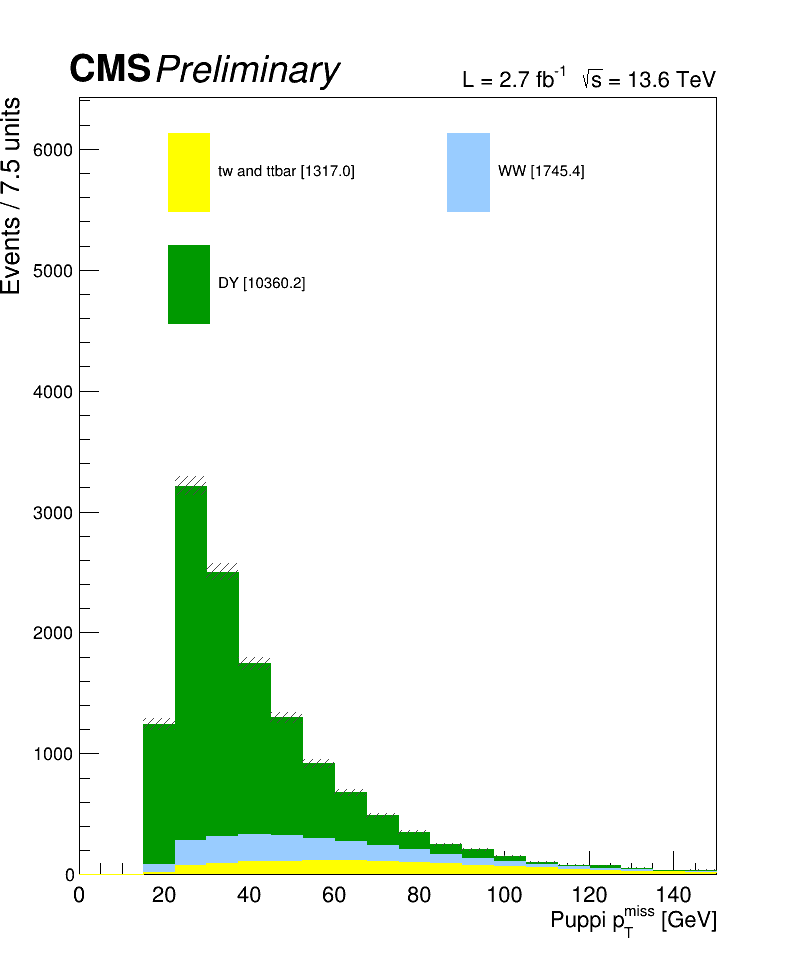

In [27]:
import CMS_lumi as CMS_lumi

tcanvas = ROOT.TCanvas("histogramPuppiMET_pt", "histogramPuppiMET_pt", 800, 1000)

minXused = variables['PuppiMET_pt']['range'][1]
maxXused = variables['PuppiMET_pt']['range'][2]
nbins = variables['PuppiMET_pt']['range'][0]
  
    
frame = ROOT.TH1F
frame = tcanvas.DrawFrame(minXused, 0.0, maxXused, 2.0*plot['PuppiMET_pt'].GetMaximum())
frame.GetXaxis().SetTitle("")
frame.GetYaxis().SetTitle("Events / " + str(round((maxXused-minXused)/nbins, 1)) + " units")
frame.GetYaxis().SetTitleOffset(1.55) 
frame.GetYaxis().SetLabelSize(0.025)

frame.GetXaxis().SetTitle(variables['PuppiMET_pt']['xaxis'] + ' [GeV]')
frame.GetXaxis().SetLabelSize(0.03)
frame.GetXaxis().SetTitleSize(0.03)
#frame.GetXaxis().SetTitleOffset(0.8)


frame.Draw()

plot['PuppiMET_pt'].Draw("hist same")

tgrMC['PuppiMET_pt'].SetLineColor(12)
tgrMC['PuppiMET_pt'].SetFillColor(12)
tgrMC['PuppiMET_pt'].SetLineWidth(2)
tgrMC['PuppiMET_pt'].SetFillStyle(3004)
tgrMC['PuppiMET_pt'].Draw("2")

legend['PuppiMET_pt'].Draw("same")
    

cmsText     = "CMS";
cmsTextFont = 61  

writeExtraText = True
extraText      = "Preliminary"
extraTextFont  = 52 
lumi_13TeV = 'L = %.1f fb^{-1}  #sqrt{s} = 13.6 TeV' % lumi


latex = ROOT.TLatex()
latex.SetNDC()
latex.SetTextAngle(0)
latex.SetTextColor(ROOT.kBlack)    

extraTextSize = 0.5

latex.SetTextFont(42)
latex.SetTextAlign(31) 
#latex.SetTextSize(lumiTextSize*t) 
latex.SetTextSize(0.03) 

latex.DrawLatex(0.90,0.91,lumi_13TeV)


latex.SetTextFont(cmsTextFont)
latex.SetTextSize(0.05)
latex.SetTextAlign(32)
latex.DrawLatex(0.19, 0.93, cmsText)

latex.SetTextFont(extraTextFont)
latex.DrawLatex(0.43, 0.925, extraText)



tcanvas.Draw()